# Horse Or Human

In [ ]:
%load_ext autoreload 
%autoreload 2

## Install `tfutils`


In [ ]:
!pip install -e /content/drive/MyDrive/projects/tfutils

Obtaining file:///content/drive/MyDrive/projects/tfutils
  Running setup.py develop for tfutils


## Some imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tfutils
import glob

## Download Data

### Train data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/train-horse-or-human.zip

--2021-07-23 05:17:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/train-horse-or-human.zip’

/tmp/train-horse-or 100%[===================>] 142.65M  92.3MB/s    in 1.5s    

2021-07-23 05:17:41 (92.3 MB/s) - ‘/tmp/train-horse-or-human.zip’ saved [149574867/149574867]



### Test data


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/test-horse-or-human.zip

--2021-07-23 05:17:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c01::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/test-horse-or-human.zip’

/tmp/test-horse-or- 100%[===================>]  10.95M  42.1MB/s    in 0.3s    

2021-07-23 05:17:42 (42.1 MB/s) - ‘/tmp/test-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import os
import zipfile


for subset in ['train', 'test']:
    local_zip = f'/tmp/{subset}-horse-or-human.zip'
    with zipfile.ZipFile(local_zip, 'r') as zip_ref:
        zip_ref.extractall(f'/tmp/{subset}-horse-or-human')


In [ ]:
DATA_DIR = {subset: f'/tmp/{subset}-horse-or-human/' for subset in ['train', 'test']}

### Structure of the directory

In [ ]:
os.listdir(DATA_DIR['train'])

['horses', 'humans']

In [ ]:
for cls_name in os.listdir(DATA_DIR['train']):
    print(cls_name)
    print('-'*10)
    print(os.listdir(os.path.join(DATA_DIR['train'], cls_name)))
    print()

horses
----------
['horse09-9.png', 'horse17-0.png', 'horse30-4.png', 'horse04-1.png', 'horse12-5.png', 'horse20-5.png', 'horse32-2.png', 'horse08-6.png', 'horse48-5.png', 'horse15-1.png', 'horse25-8.png', 'horse33-5.png', 'horse02-1.png', 'horse04-0.png', 'horse29-5.png', 'horse01-0.png', 'horse01-2.png', 'horse44-0.png', 'horse15-9.png', 'horse49-8.png', 'horse14-2.png', 'horse16-4.png', 'horse42-4.png', 'horse32-0.png', 'horse19-6.png', 'horse50-4.png', 'horse36-1.png', 'horse29-0.png', 'horse37-3.png', 'horse24-9.png', 'horse48-8.png', 'horse18-7.png', 'horse27-4.png', 'horse15-6.png', 'horse01-3.png', 'horse02-2.png', 'horse29-6.png', 'horse35-8.png', 'horse50-2.png', 'horse20-0.png', 'horse29-8.png', 'horse26-4.png', 'horse18-5.png', 'horse19-3.png', 'horse30-9.png', 'horse24-8.png', 'horse44-3.png', 'horse16-6.png', 'horse06-9.png', 'horse16-9.png', 'horse12-1.png', 'horse07-1.png', 'horse12-3.png', 'horse45-9.png', 'horse11-8.png', 'horse09-3.png', 'horse35-0.png', 'horse34-8.p

In [ ]:
CLASS_NAMES = sorted(os.listdir(DATA_DIR['train']))

In [ ]:
DATA_FILES = {cls_name : {} for cls_name in CLASS_NAMES}


for cls_name in CLASS_NAMES:
    for subset in ['train', 'test']:
        dirpath = os.path.join(DATA_DIR[subset], cls_name)
        DATA_FILES[cls_name][subset] = glob.glob(dirpath + '/*')



## Visualize some images

In [ ]:
import matplotlib.image as mpimg

In [ ]:
num_images = 4
num_classes = 2
subset = 'train'
dir_idx = 0

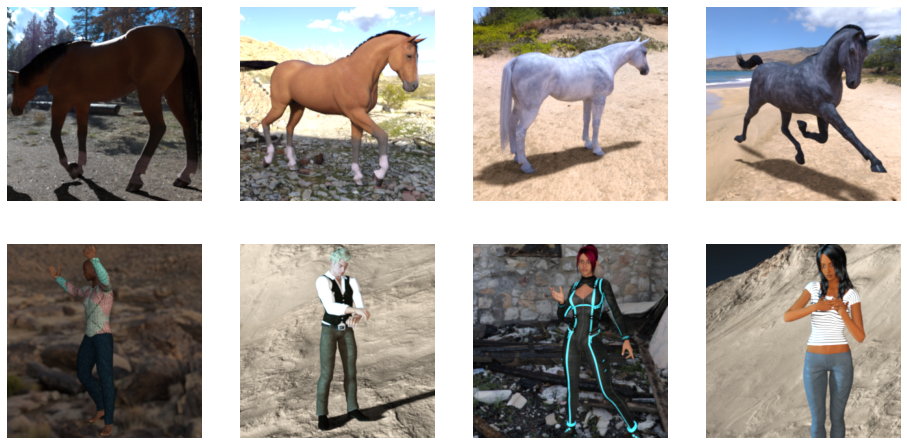

In [ ]:
fig, axn = plt.subplots(num_classes, num_images, figsize=(num_images*4, num_classes*4))

for cls_name, row in zip(CLASS_NAMES, axn):
    idx = 0
    for ax in row:
        data_file = DATA_FILES[cls_name][subset][dir_idx + idx]
        img = mpimg.imread(data_file)
        ax.imshow(img)

        ax.grid(False)
        ax.set_axis_off()

        idx += 1


dir_idx += idx



In [ ]:
from tensorflow.keras import layers, optimizers, callbacks

## Some Global Variables

In [ ]:
TARGET_IMG_SHAPE = (300, 300)
NUM_CHANNELS = 3
INPUT_SHAPE = (*TARGET_IMG_SHAPE, NUM_CHANNELS)
N_CLASSES = 2 
BATCH_SIZE = 128
CLASSIFICATION_TYPE = 'binary'
RANDOM_STATE = 42
VALIDATION_SPLIT = 0.2

## Building a Small Model

In [ ]:
if CLASSIFICATION_TYPE is 'binary':
    output_neurons = 1
else:
    output_neurons = N_CLASSES

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, 3, activation='relu', input_shape=INPUT_SHAPE),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(output_neurons, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

### Preprocess Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=VALIDATION_SPLIT)
test_datagen = ImageDataGenerator(rescale=1/255)

### Setup Directories

In [ ]:
train_dir = DATA_DIR['train']
test_dir = DATA_DIR['test']

### Import Data from directories 

In [ ]:
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=TARGET_IMG_SHAPE, batch_size=BATCH_SIZE,
                                                    class_mode=CLASSIFICATION_TYPE, subset='training', seed=RANDOM_STATE)
val_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=TARGET_IMG_SHAPE, batch_size=BATCH_SIZE,
                                                  class_mode=CLASSIFICATION_TYPE, subset='validation', seed=RANDOM_STATE)
test_generator = test_datagen.flow_from_directory(directory=test_dir, target_size=TARGET_IMG_SHAPE, batch_size=BATCH_SIZE,
                                              class_mode=CLASSIFICATION_TYPE, shuffle=False)

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Fit the model

In [ ]:
%%time
history = model.fit(train_generator, steps_per_epoch=len(train_generator), validation_data=val_generator, validation_steps=len(val_generator), epochs=15)

Epoch 1/15
7/7 [==============================] - 26s 1s/step - loss: 1.5300 - accuracy: 0.4915 - val_loss: 0.6875 - val_accuracy: 0.6439
Epoch 2/15
7/7 [==============================] - 7s 1s/step - loss: 0.6638 - accuracy: 0.5876 - val_loss: 0.6929 - val_accuracy: 0.4878
Epoch 3/15
7/7 [==============================] - 7s 1s/step - loss: 0.5704 - accuracy: 0.7044 - val_loss: 0.5157 - val_accuracy: 0.8000
Epoch 4/15
7/7 [==============================] - 7s 1s/step - loss: 0.5771 - accuracy: 0.7433 - val_loss: 0.4906 - val_accuracy: 0.7317
Epoch 5/15
7/7 [==============================] - 7s 1s/step - loss: 0.4342 - accuracy: 0.7956 - val_loss: 0.2607 - val_accuracy: 0.9122
Epoch 6/15
7/7 [==============================] - 7s 1s/step - loss: 0.2254 - accuracy: 0.9161 - val_loss: 0.1853 - val_accuracy: 0.9366
Epoch 7/15
7/7 [==============================] - 7s 1s/step - loss: 0.5642 - accuracy: 0.7871 - val_loss: 0.7120 - val_accuracy: 0.6244
Epoch 8/15
7/7 [========================

## Testing on Actual Data

In [ ]:
import numpy as np
from google.colab import files

uploaded = files.upload()


Saving horse.jpg to horse.jpg


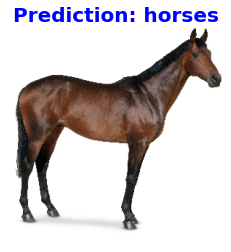

In [ ]:


for file in uploaded.keys():
    fpath = f'/content/{file}'
    img = tf.keras.preprocessing.image.load_img(fpath, target_size=TARGET_IMG_SHAPE)
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
    img = tf.keras.preprocessing.image.img_to_array(img)
    X = np.expand_dims(img, axis=0)

    pred_prob = np.squeeze(model.predict(X, batch_size=10))
    pred_label = (pred_prob > 0.5).astype(int)
    pred_clsname = CLASS_NAMES[pred_label]
    
    plt.title(f'Prediction: {pred_clsname}', fontdict=dict(size=20, weight='bold', color='blue'))



## Visualizing Intermediate Representations

In [ ]:
def load_img(fpath):
    img = tf.keras.preprocessing.image.load_img(img_fpath)
    img = tf.keras.preprocessing.image.img_to_array(img)

    return img

def preprocess_img(img):
    img = img/255.
    img = np.expand_dims(img, axis=0)
    return img

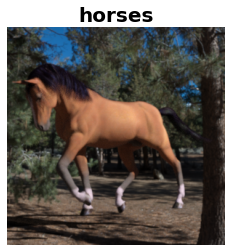

In [ ]:
import random

rand_clsname = random.choice(CLASS_NAMES)
img_fpath = random.choice(DATA_FILES[rand_clsname]['train'])

# Load
img = load_img(img_fpath)

# Plot the image
plt.grid(False)
plt.axis('off')
plt.imshow(img.astype(int))
plt.title(rand_clsname, fontdict=dict(size=20, weight='bold'))

# Preprocess
img = preprocess_img(img)


In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.inputs, outputs=successive_outputs)

successive_feature_maps = visualization_model.predict(img)



In [ ]:
def postprocess_feature_map(feature_map):
    mu = feature_map.mean(axis=(1, 2), keepdims=True)
    std = feature_map.std(axis=(1, 2), keepdims=True)
    feature_map = ((feature_map - mu)*64/std) + 128
    feature_map = np.clip(feature_map, 0, 255).astype('uint8')

    return feature_map
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


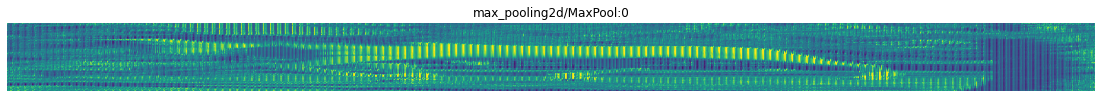

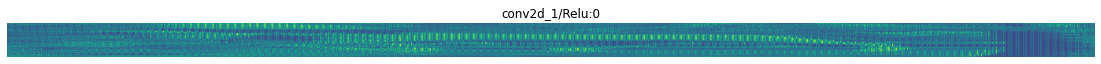

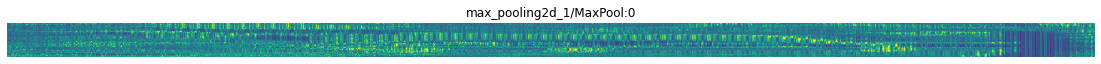

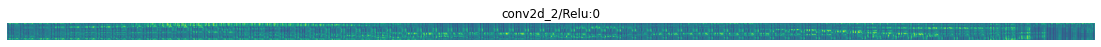

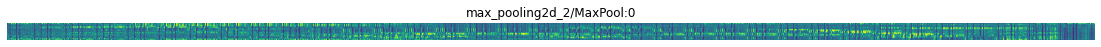

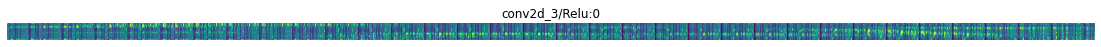

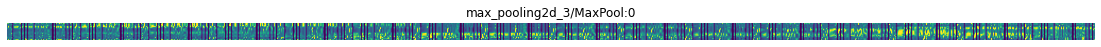

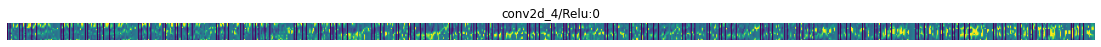

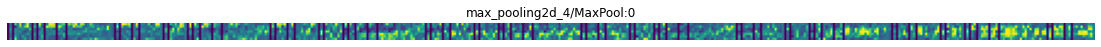

In [ ]:
for i, (feature_map, layer) in enumerate(zip(successive_feature_maps, successive_outputs)):

    if len(feature_map.shape) == 4: # check if convolutional layer
        feature_height = feature_map.shape[1]
        feature_width = feature_map.shape[2]
        num_features = feature_map.shape[-1]


        feature_plot_grid = postprocess_feature_map(feature_map).reshape(feature_height, -1)

        scale = 20. / num_features
        plt.figure(figsize=(scale * num_features, scale))
        plt.grid(False)
        plt.axis('off')
        plt.imshow(feature_plot_grid)
        plt.title(layer.name)

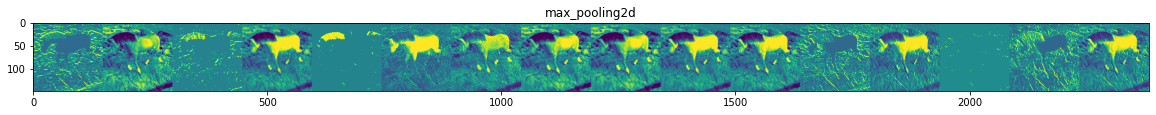

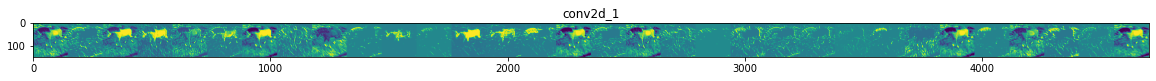

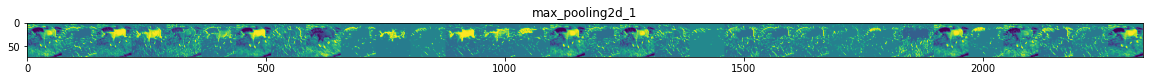

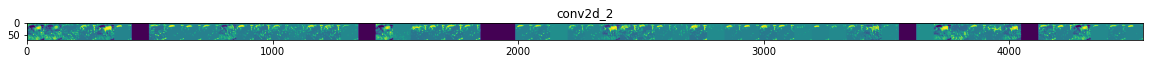

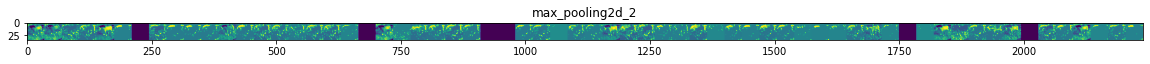

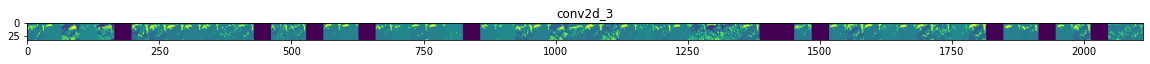

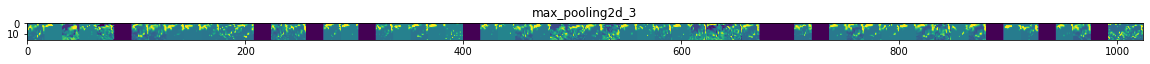

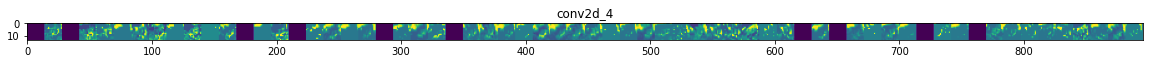

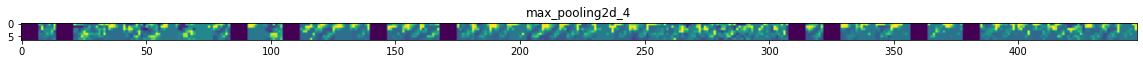

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = DATA_FILES['horses']['train']
human_img_files = DATA_FILES['humans']['train']
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
# successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

* As we examine the journey of the image through the depth of the network (top to bottom), we see that the representation of the images (i.e. the features being learned or the neurons being activated) become increasingly abstract. 
* The downstream representations start highlighting what network pays attention to (light up -> high activations), with fewer more specialized higher level - tangible features being activated only, while other features are mostly set to 0. This is called "sparsity".
* Representation "sparsity" is a key feature of deep learning.
* The representations carry increasingly specialized information about the original pixels in the image which is most relevant to predicting the output class. Hence we can think of convnets (or even any deep networks) as information distillation pipeline. 
* Hence, in transfer learning, depending upon our downstream task, if it is almost the same task as the pretrained model task, we tend to give more importance to the final layers. On ther other hand, if our task is too specialized, we tend to extract knowledge from initial layers of the pretrained model only (as these learn lower level feature i.e. building blocks which can make up higher level tangile features)